# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import time

# Import API key
from env.api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [68]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info

found_cities = []
clouds = []
country = []
dt = []
humidity = []
temp_max = []
wind = []
lat = []
lon = []

# Set the date of data collection for later use.
date = pd.to_datetime('today').strftime('%m/%d/%y')

# Set up record and set counters
record = 0
set = 1
setsize = 50

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if record > setsize:
        set +=1
        record = 0
        # Sleep for a minute since we're only allowed 60 requests per minute
        time.sleep(60)
    else:
        print(f"Processing Record {record} of Set {set} | {city}")
        response = requests.get(query_url + city).json()
        try:
            clouds.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            dt.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])
            found_cities.append(city)
            record += 1
 
        except:
            print(f"City \033[1m{city}\033[0m not found. Skipping...")
        
           
print ("""-----------------------------
Data Retrieval Complete      
-----------------------------""")


Processing Record 0 of Set 1 | taolanaro
City taolanaro not found. Skipping...
Processing Record 0 of Set 1 | hervey bay
Processing Record 1 of Set 1 | sitka
Processing Record 2 of Set 1 | rawson
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | puerto baquerizo moreno
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | kikwit
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | bembereke
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | nouadhibou
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | eyl
Processing Record 18 of Set 1 | aden
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | lagoa
Processing Record 22 o

Processing Record 17 of Set 4 | areosa
Processing Record 18 of Set 4 | porosozero
Processing Record 19 of Set 4 | salinopolis
Processing Record 20 of Set 4 | isahaya
Processing Record 21 of Set 4 | castro
Processing Record 22 of Set 4 | champerico
Processing Record 23 of Set 4 | eenhana
Processing Record 24 of Set 4 | san cristobal
Processing Record 25 of Set 4 | tuatapere
Processing Record 26 of Set 4 | veraval
Processing Record 27 of Set 4 | paita
Processing Record 28 of Set 4 | sumbawa
City sumbawa not found. Skipping...
Processing Record 28 of Set 4 | clyde river
Processing Record 29 of Set 4 | mandalgovi
Processing Record 30 of Set 4 | bargal
City bargal not found. Skipping...
Processing Record 30 of Set 4 | truckee
Processing Record 31 of Set 4 | kozhevnikovo
Processing Record 32 of Set 4 | kavaratti
Processing Record 33 of Set 4 | hambantota
Processing Record 34 of Set 4 | luderitz
Processing Record 35 of Set 4 | broken hill
Processing Record 36 of Set 4 | biak
Processing Record

Processing Record 27 of Set 7 | garoua
Processing Record 28 of Set 7 | saint-georges
Processing Record 29 of Set 7 | pozo colorado
Processing Record 30 of Set 7 | kualakapuas
Processing Record 31 of Set 7 | upata
Processing Record 32 of Set 7 | ondjiva
Processing Record 33 of Set 7 | lompoc
Processing Record 34 of Set 7 | kandrian
Processing Record 35 of Set 7 | boyolangu
Processing Record 36 of Set 7 | balao
Processing Record 37 of Set 7 | killybegs
Processing Record 38 of Set 7 | kargasok
Processing Record 39 of Set 7 | makamba
Processing Record 40 of Set 7 | gizo
Processing Record 41 of Set 7 | acarau
Processing Record 42 of Set 7 | mentok
City mentok not found. Skipping...
Processing Record 42 of Set 7 | ixtapa
Processing Record 43 of Set 7 | ziro
Processing Record 44 of Set 7 | ketchikan
Processing Record 45 of Set 7 | visnes
Processing Record 46 of Set 7 | talakan
Processing Record 47 of Set 7 | darnah
Processing Record 48 of Set 7 | umzimvubu
City umzimvubu not found. Skipping..

Processing Record 0 of Set 11 | yokadouma
Processing Record 1 of Set 11 | dabeiba
Processing Record 2 of Set 11 | saint-augustin
Processing Record 3 of Set 11 | otane
Processing Record 4 of Set 11 | belmonte
Processing Record 5 of Set 11 | caravelas
Processing Record 6 of Set 11 | san carlos de bariloche
Processing Record 7 of Set 11 | pauini
Processing Record 8 of Set 11 | tucurui
Processing Record 9 of Set 11 | dunkwa
Processing Record 10 of Set 11 | auki
Processing Record 11 of Set 11 | faya
Processing Record 12 of Set 11 | ngukurr
City ngukurr not found. Skipping...
Processing Record 12 of Set 11 | merauke
Processing Record 13 of Set 11 | alice springs
Processing Record 14 of Set 11 | maygatasan
Processing Record 15 of Set 11 | pangody
Processing Record 16 of Set 11 | roald
Processing Record 17 of Set 11 | vestmanna
Processing Record 18 of Set 11 | aykhal
Processing Record 19 of Set 11 | raudeberg
Processing Record 20 of Set 11 | wattegama
Processing Record 21 of Set 11 | montrose


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [80]:
# Create a dataframe from the weather information lists.
cities_df = pd.DataFrame({
    'City':found_cities,
    'Cloudiness':temp_max,
    'Country':country,
    'Date':dt,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lon,
    'Max Temp':temp_max,
    'Wind Speed':wind
})

In [81]:
# Export the city data to a .csv.
outfile = "output_data/cities.csv"
cities_df.to_csv(outfile, index=False, header=True)

In [82]:
# Display the dataframe value counts.
cities_df.count()

City          564
Cloudiness    564
Country       564
Date          564
Humidity      564
Lat           564
Lng           564
Max Temp      564
Wind Speed    564
dtype: int64

In [83]:
# Display the dataframe.
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hervey bay,84.20,AU,1579733429,74,-25.30,152.85,84.20,11.41
1,sitka,42.80,US,1579733213,75,57.05,-135.33,42.80,3.36
2,rawson,67.42,AR,1579733429,69,-43.30,-65.10,67.42,13.33
3,upernavik,0.59,GL,1579733206,93,72.79,-56.15,0.59,8.25
4,albany,30.20,US,1579733429,63,42.60,-73.97,30.20,2.04
...,...,...,...,...,...,...,...,...,...
559,katsuura,44.60,JP,1579733855,65,35.13,140.30,44.60,2.24
560,cochrane,42.80,CA,1579734020,40,51.18,-114.47,42.80,16.11
561,west odessa,68.00,US,1579734151,39,31.84,-102.50,68.00,14.99
562,mala,64.62,PE,1579734151,89,-12.66,-76.63,64.62,3.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

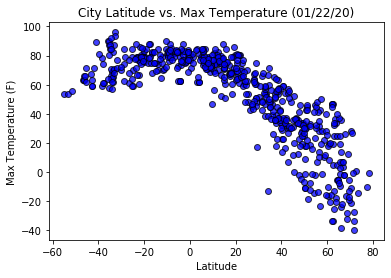

In [84]:
x_axis = cities_df['Lat']
data = cities_df['Max Temp']
plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)


#### Latitude vs. Humidity Plot

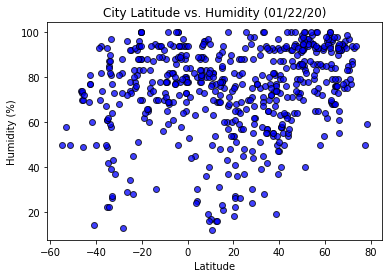

In [85]:
x_axis = cities_df['Lat']
data = cities_df['Humidity']
plt.title("City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)


#### Latitude vs. Cloudiness Plot

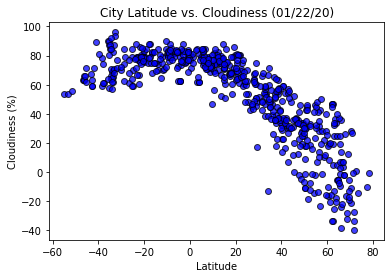

In [86]:
x_axis = cities_df['Lat']
data = cities_df['Cloudiness']
plt.title("City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)


#### Latitude vs. Wind Speed Plot

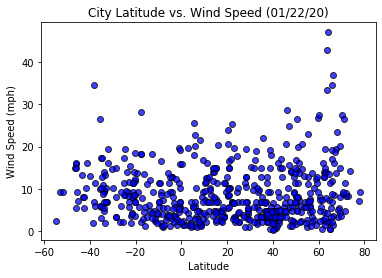

In [87]:
x_axis = cities_df['Lat']
data = cities_df['Wind Speed']
plt.title("City Latitude vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)


## Linear Regression

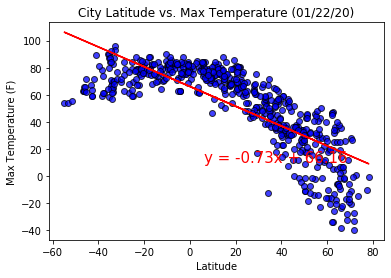

In [88]:
# OPTIONAL: Create a function to create Linear Regression plots
x_axis = cities_df['Lat']
data = cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()


In [92]:
# Create Northern and Southern Hemisphere DataFrames
northern_cities_df = cities_df.loc[cities_df['Lat'] > 0]
southern_cities_df = cities_df.loc[cities_df['Lat'] < 0]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hervey bay,84.20,AU,1579733429,74,-25.30,152.85,84.20,11.41
2,rawson,67.42,AR,1579733429,69,-43.30,-65.10,67.42,13.33
5,puerto baquerizo moreno,80.60,EC,1579733429,78,-0.90,-89.60,80.60,11.41
7,kikwit,72.63,CD,1579733430,86,-5.04,18.82,72.63,1.25
11,codrington,59.27,AU,1579733430,70,-38.27,141.97,59.27,34.56
...,...,...,...,...,...,...,...,...,...
537,saint-leu,78.80,RE,1579734088,94,-21.15,55.28,78.80,11.41
538,pemba,77.41,MZ,1579734012,70,-12.97,40.52,77.41,4.36
550,vila velha,75.99,BR,1579734090,94,-20.33,-40.29,75.99,6.93
558,euclides da cunha,72.37,BR,1579734091,92,-10.51,-39.02,72.37,4.32


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

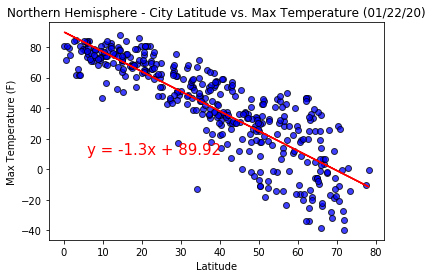

In [93]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

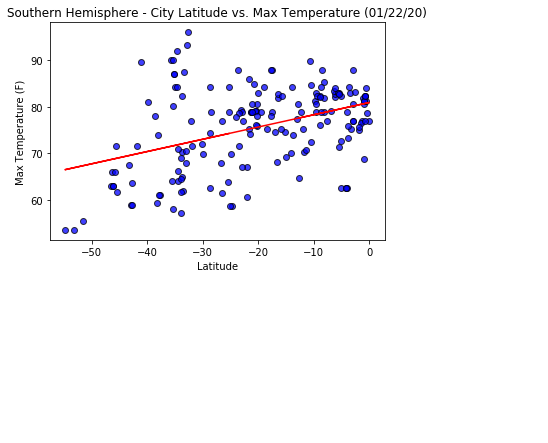

In [94]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

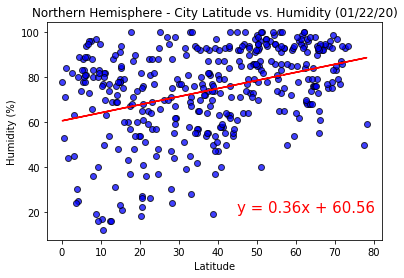

In [106]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(45,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

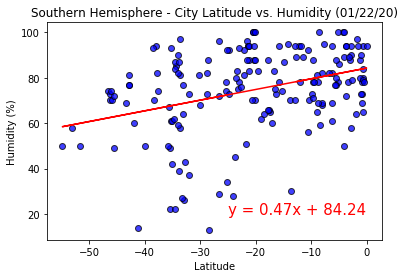

In [109]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(-25,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

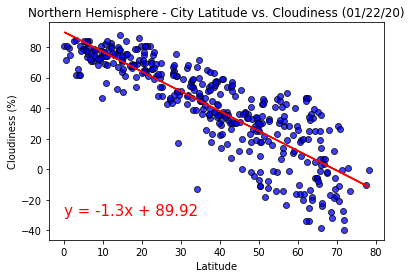

In [110]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(0,-30),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

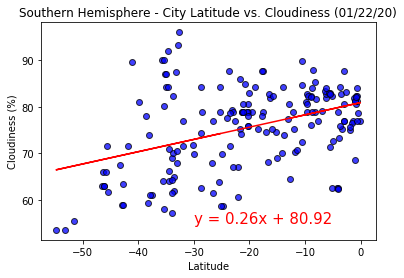

In [113]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(-30,55),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

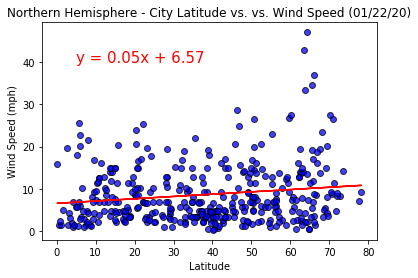

In [115]:
x_axis = northern_cities_df['Lat']
data = northern_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(5,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - City Latitude vs. vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

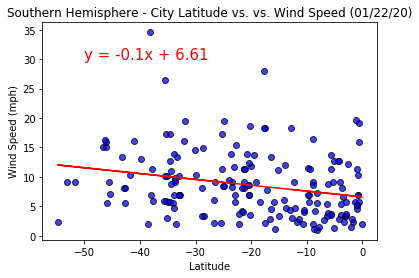

In [119]:
x_axis = southern_cities_df['Lat']
data = southern_cities_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,xy=(-50,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - City Latitude vs. vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()